# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

In [70]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [8]:
import sklearn
sklearn.__version__

'0.21.2'

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [95]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)


# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### Part 1:

Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

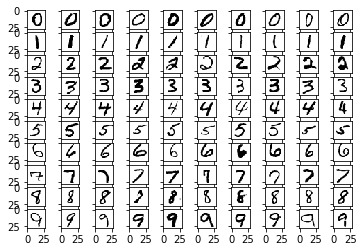

In [10]:
def P1(num_examples=10):

### STUDENT START ###
    imgarr = []
    for i in range(10):
        pt = 0
        count = 0
        imgarr.append([])
        while count<num_examples:
            if (i == int(Y[pt])):
                count = count+1
                imgarr[i].append(pt)
            pt = pt + 1
                
    #print(imgarr)
    fig, ax = plt.subplots(10, num_examples, sharex='col', sharey='row')
    for i in range(10):
        for j in range(num_examples):
            img = X[imgarr[i][j]].reshape(28,28)
            ax[i, j].imshow(img, cmap=plt.get_cmap('gray_r'))
    

### STUDENT END ###

P1(10)

### Part 2:

Produce k-Nearest Neighbors models with k $\in$ [1,3,5,7,9].  Evaluate and show the accuracy of each model. For the 1-Nearest Neighbor model, additionally show the precision, recall, and F1 for each label. Which digit is the most difficult for the 1-Nearest Neighbor model to recognize?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.

In [12]:
def P2(k_values):

### STUDENT START ###
    for k in k_values:
        # Create a kNN model using KNeighborsClassifier
        kNN_model = KNeighborsClassifier(n_neighbors=k)
        # Fit the model with the mini training set
        kNN_model.fit(mini_train_data, mini_train_labels)
        # Predict the dev set
        dev_predicted_labels = kNN_model.predict(dev_data)
        # Report accuracy for the dev set
        print('Accuracy using k = {0:d} neighbors: {1:.3f}'.format(k, kNN_model.score(dev_data, dev_labels)))
        # For k=1, show precision, recall, and F1 for each label.
        if k == 1:
            labels = np.unique(Y).astype(int).astype('S')
            print('\nPrecission, recall, and F1 for each digit when k = 1:')
            print(classification_report(dev_labels, dev_predicted_labels, target_names = labels))
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

Accuracy using k = 1 neighbors: 0.884

Precission, recall, and F1 for each digit when k = 1:
              precision    recall  f1-score   support

        b'0'       0.95      0.95      0.95       106
        b'1'       0.89      0.98      0.93       118
        b'2'       0.90      0.79      0.84       106
        b'3'       0.93      0.87      0.90        97
        b'4'       0.91      0.85      0.88        92
        b'5'       0.86      0.88      0.87        88
        b'6'       0.92      0.92      0.92       102
        b'7'       0.85      0.94      0.89       102
        b'8'       0.83      0.77      0.80        94
        b'9'       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

Accuracy using k = 3 neighbors: 0.876
Accuracy using k = 5 neighbors: 0.882
Accuracy using k = 7 neighbors: 0.877
Accuracy using k = 9 neighbors: 0.

#### ANSWER: The most difficult digit to predict for 1-nearest Neighbor is 8 as f1-score is lowest for it.

### Part 3:

Produce 1-Nearest Neighbor models using training data of various sizes.  Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

Notes:
* Train on subsets of the train set.  For each subset, take just the first part of the train set without re-ordering.
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

In [13]:
def P3(train_sizes, accuracies):

### STUDENT START ###
    elapsed_times = []
    # Create a 1NN model
    NN_model = KNeighborsClassifier(n_neighbors=1)
    # For different training set sizes...
    for size in train_sizes:
        # Estimate computation time
        start = time.time()
        # Fit the model with the corresponding training set
        train_data, train_labels = X[:size], Y[:size]
        NN_model.fit(train_data, train_labels)
        # Estimate the dev set accuracy
        accuracies.append(NN_model.score(dev_data, dev_labels))
        end = time.time()
        elapsed_times.append(end - start)
    print(''.join('Training size = {0:5d} => Accuracy = {1:.3f} => Elapsed time = {2:4.2f}\n'.format(x,y,z) for x,y,z in 
                  zip(train_sizes, accuracies, elapsed_times)))


### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
P3(train_sizes, accuracies)

Training size =   100 => Accuracy = 0.702 => Elapsed time = 0.10
Training size =   200 => Accuracy = 0.791 => Elapsed time = 0.19
Training size =   400 => Accuracy = 0.811 => Elapsed time = 0.36
Training size =   800 => Accuracy = 0.866 => Elapsed time = 0.72
Training size =  1600 => Accuracy = 0.905 => Elapsed time = 1.50
Training size =  3200 => Accuracy = 0.927 => Elapsed time = 3.07
Training size =  6400 => Accuracy = 0.939 => Elapsed time = 6.23
Training size = 12800 => Accuracy = 0.952 => Elapsed time = 12.77
Training size = 25600 => Accuracy = 0.963 => Elapsed time = 26.86



### Part 4:

Produce a linear regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Show $R^2$ of the linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data.  What's wrong with using linear regression here?

Apply a transformation to the predictor features and a transformation to the outcome that make the predictions more reasonable.  Show $R^2$ of the improved linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data - be sure to display accuracies and training set sizes in appropriate units.

Notes:
* Train the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.
* Hint re: predictor feature transform: Accuracy increases with training set size logarithmically.
* Hint re: outcome transform: When y is a number in range 0 to 1, then odds(y)=y/(1-y) is a number in range 0 to infinity.


R-Squared is 0.4177006634161019
Accuracy for n = 60000 (y=a+bX): [1.23617317]
R-Squared for Log transformation is 0.9068304252436643
Accuracy for n = 60000 (y=a+b*log(X)): [1.03358792]
R-Squared for Square Root transformation is 0.6335231664234305
Accuracy for n = 60000 (Y=a+b*sqrt(X)): [1.13074072]
R-Squared for Log of Log transformation is 0.9574359175742508
Accuracy for n = 60000 (y=a+b*log(log(X))): [1.01155965]

R-Squared is 0.4177006634161019
Accuracy for n = 120000 (y=a+bX): [1.63742805]
R-Squared for Log transformation is 0.9068304252436643
Accuracy for n = 120000 (y=a+b*log(X)): [1.06432125]
R-Squared for Square Root transformation is 0.6335231664234305
Accuracy for n = 120000 (Y=a+b*sqrt(X)): [1.27069338]
R-Squared for Log of Log transformation is 0.9574359175742508
Accuracy for n = 120000 (y=a+b*log(log(X))): [1.03123018]

R-Squared is 0.4177006634161019
Accuracy for n = 1000000 (y=a+bX): [7.52249967]
R-Squared for Log transformation is 0.9068304252436643
Accuracy for n = 1

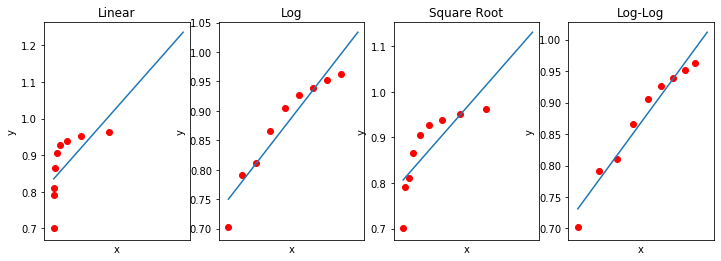

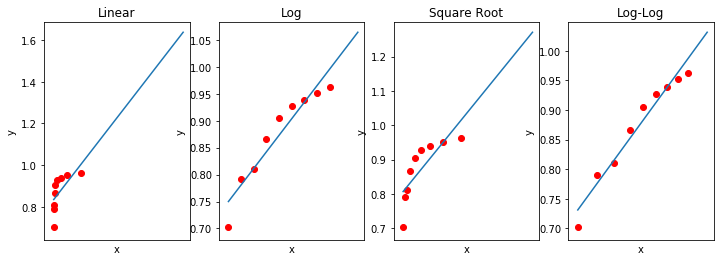

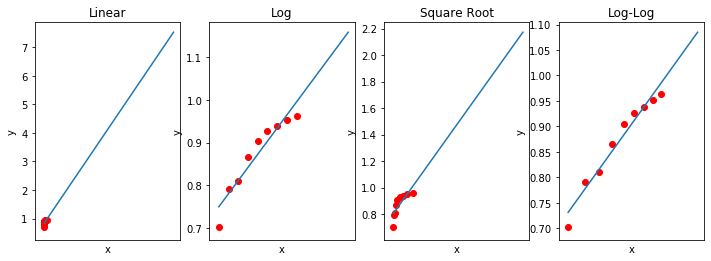

In [73]:
def P4():

### STUDENT START ###
    train_size = [60000,120000,1000000]
    # First we traspose the features (training set size) and labels (accuracy)
    X = np.array(train_sizes)[:,np.newaxis]
    y = np.array(accuracies)
    #X = train_sizes.values.reshape(-1,1)
    #y = accuracies.values.reshape(-1,1)
    regression_model = LinearRegression()
    regression_model.fit(X, y)
    #print(X,y)
    for train_num in train_size:
        regression_model = LinearRegression()
        regression_model.fit(X, y)
        y_predict = regression_model.predict(X)
        r_sq = r2_score(y, y_predict)
        print("\nR-Squared is {}".format(r_sq))

        #print(train_num)
        temp = regression_model.predict([[train_num]])
        #print(temp[0][0])
        print('Accuracy for n = {} (y=a+bX): {}'.format(train_num,temp))
        
    
        # Plot regression line and the examples used to fit the model    
        plt.figure(figsize=(12, 4))
        ax = plt.subplot(1, 4, 1)
        plt.setp(ax, xticks=())
        x = np.linspace(X.min(), train_num, 100)[:,np.newaxis]
        plt.plot(x, regression_model .predict(x))
        plt.scatter(X, y, color='red')
        plt.xlabel("x")
        plt.ylabel("y")
        plt.title('Linear')

        # Let's transform X using its log 
        logX = np.log10(X)
        regression_model.fit(logX, y)
        y_predict = regression_model.predict(logX)
        r_sq = r2_score(y, y_predict)
        print("R-Squared for Log transformation is {}".format(r_sq))

        temp = regression_model.predict([[np.log10(train_num)]])
        print('Accuracy for n = {} (y=a+b*log(X)): {}'.format(train_num,temp))

        # Plot regression line and the examples used to fit the model
        ax = plt.subplot(1, 4, 2)
        plt.setp(ax, xticks=())
        x = np.linspace(np.log10(X.min()), np.log10(train_num), 100)[:,np.newaxis]
        plt.plot(x, regression_model .predict(x))
        plt.scatter(np.log10(X), y, color='red')
        plt.xlabel("x")
        plt.ylabel("y")
        plt.title('Log')

        # Let's also try the square root of X (very similar to the log)
        sqrtX = np.sqrt(X)
        regression_model .fit(sqrtX, y)
        y_predict = regression_model.predict(sqrtX)
        r_sq = r2_score(y, y_predict)
        print("R-Squared for Square Root transformation is {}".format(r_sq))

        temp = regression_model.predict([[np.sqrt(train_num)]])
        print('Accuracy for n = {} (Y=a+b*sqrt(X)): {}'.format(train_num,temp))
    
        
        # Plot regression line and the examples used to fit the model
        ax = plt.subplot(1, 4, 3)
        plt.setp(ax, xticks=())
        x = np.linspace(np.sqrt(X.min()), np.sqrt(train_num), 100)[:,np.newaxis]
        plt.plot(x, regression_model .predict(x))
        plt.scatter(np.sqrt(X), y, color='red')
        plt.xlabel("x")
        plt.ylabel("y")
        plt.title('Square Root')

        # And finally the log of the log of X (because log(X) vs. y was still a concave curve
        log_logX = np.log10(np.log10(X))
        regression_model .fit(log_logX, y)
        y_predict = regression_model.predict(log_logX)
        r_sq = r2_score(y, y_predict)
        print("R-Squared for Log of Log transformation is {}".format(r_sq))

        temp = regression_model.predict([[np.log10(np.log10(train_num))]])
        print('Accuracy for n = {} (y=a+b*log(log(X))): {}'.format(train_num,temp))

        ax = plt.subplot(1, 4, 4)
        plt.setp(ax, xticks=())
        x = np.linspace(np.log10(np.log10(X.min())), np.log10(np.log10(train_num)), 100)[:,np.newaxis]
        plt.plot(x, regression_model .predict(x))
        plt.scatter(np.log10(np.log10(X)), y, color='red')
        plt.xlabel("x")
        plt.ylabel("y")
        plt.title('Log-Log')    
### STUDENT END ###

P4()

#### ANSWER: The value predicted for accuracy using Linear Regression is greater than 1. The value of accuracy has to be between 0 and 1. Even after applying transformation, prediction of accuracy is greater than 1. However it is just above 1 for Log of Log transformation. 

### Part 5:

Produce a 1-Nearest Neighbor model and show the confusion matrix. Which pair of digits does the model confuse most often? Show the images of these most often confused digits.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.

[[ 91   0   1   0   1   0   2   0   0   0]
 [  0  99   0   0   0   0   0   0   0   1]
 [  1   2  72   4   2   0   0   5   3   0]
 [  0   1   1  73   1   6   0   1   1   1]
 [  2   0   0   0  86   0   0   1   0  16]
 [  0   1   0   6   2  67   2   0   3   1]
 [  2   5   0   0   2   0 113   0   2   1]
 [  0   3   0   0   1   0   0  96   0   5]
 [  1   6   0   4   0   5   2   0  88   2]
 [  0   1   0   1   6   1   0   5   0  92]]

28
['7' '6' '3' '0' '1' '8' '5' '6' '0' '1' '7' '4' '1' '1' '4' '3' '7' '6'
 '4' '1' '9' '8' '0' '9' '0' '6' '7' '5' '9' '5' '0' '8' '6' '1' '1' '4'
 '5' '8' '9' '8' '6' '1' '4' '1' '3' '5' '8' '9' '5' '6' '3' '8' '2' '6'
 '1' '2' '7' '9' '8' '4' '1' '3' '8' '0' '7' '2' '1' '6' '3' '1' '8' '5'
 '0' '4' '0' '6' '9' '6' '1' '5' '4' '0' '2' '9' '9' '5' '8' '3' '5' '2'
 '9' '1' '5' '6' '7' '9' '3' '7' '9' '3' '9' '0' '0' '5' '6' '8' '6' '4'
 '6' '5' '9' '0' '6' '6' '6' '1' '7' '5' '5' '7' '4' '6' '3' '2' '7' '7'
 '3' '6' '9' '4' '9' '9' '6' '2' '0' '1' '6' '3' '6' '

IndexError: index 0 is out of bounds for axis 0 with size 0

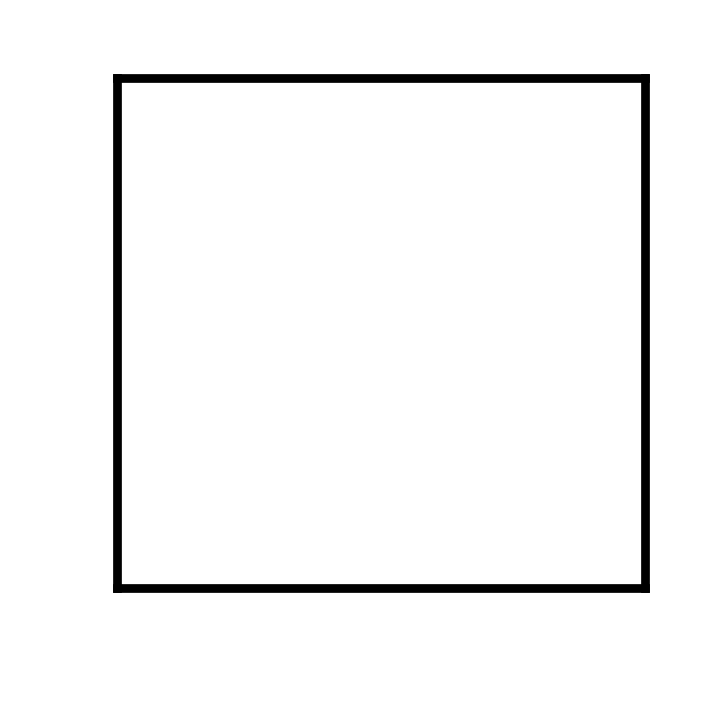

In [103]:
def P5():

### STUDENT START ###
    # Create a 1NN model
    NN_model = KNeighborsClassifier(n_neighbors=1)
    # Fit the model with the "mini" training set
    NN_model.fit(mini_train_data, mini_train_labels)
    # Create the confusion matrix for the dev data
    confusion = confusion_matrix(dev_labels, NN_model.predict(dev_data))
    print(confusion)
    print()
    # The diagonal elements corresponds to success pairs
    # Delete them since we're interested in errors (confused pairs)
    np.fill_diagonal(confusion, 0)
    num_confused_pairs = 5
    num_examples = 4
    # Display the top "num_examples" confused pairs
    dim = int(np.sqrt(X.shape[1]))
    print(dim)
    # Define image properties
    plt.rc('image', cmap='Greys')
    plt.figure(figsize=(num_examples,num_confused_pairs), dpi=X.shape[1])
    for i in range(num_confused_pairs):
        # Find the position of the (left) top confused pair
        row,col = np.unravel_index(confusion.argmax(), confusion.shape)
        # Hence, row corresponds to the true digit and col to the (wrongly) predicted digit
        features_confused_digit = dev_data[(dev_labels == row) & (NN_model.predict(dev_data) == col)]
        #features_confused_digit = [dev_data in x for dev_data
        print(dev_labels)
        print(row,col,features_confused_digit)
        np.random.shuffle(features_confused_digit)
        print('4 of the {0:2d} cases in which the digit {1:d} is confused with the digit {2:d}.'.format(confusion.max(), 
                                                                                                       row, col))
        for j in range(num_examples):
            # Create subplot
            plt.subplot(num_confused_pairs, num_examples, i*num_examples + j + 1)
            #plt.subplots_adjust(wspace=0, hspace=0)
            # Hide tickmarks and scale
            ax = plt.gca()
            ax.axes.get_xaxis().set_visible(False)
            ax.axes.get_yaxis().set_visible(False)
            # Plot the corresponding digit
            # (reshaped to square matrix/image)
            confused_digit = features_confused_digit[j].reshape((dim,dim))
            plt.imshow(confused_digit)
        # After displaying a top confused pair, delete it to display the next
        confusion[row,col] = 0 

    
### STUDENT END ###

P5()

ANSWER: 

### Part 6:

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur filter by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

Pick a weight, then produce and evaluate four 1-Nearest Neighbor models by applying your blur filter in these ways:
- Do not use the filter
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data

Show the accuracies of the four models evaluated as described.  Try to pick a weight that makes one model's accuracy at least 0.9.

Notes:
* Train on the (filtered) mini train set.
* Evaluate performance on the (filtered) dev set.
* There are other Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but you are likely to get the best results with the simplified version described above.

In [0]:
#def P6():
    
### STUDENT START ###


### STUDENT END ###

#P6()

### Part 7:

Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.

For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter to set the white/black separation threshold to 0.1.  Use `BernoulliNB` to produce the model.

For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data, seting the white/gray/black separation thresholds to 0.1 and 0.9.  Use `MultinomialNB` to produce the model. 

Show the Bernoulli model accuracy and the Multinomial model accuracy.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* `sklearn`'s Naive Bayes methods can handle real numbers, but for this exercise explicitly do the mapping to categoricals. 

Does the multinomial version improve the results? Why or why not?

In [0]:
#def P7():

### STUDENT START ###


    
### STUDENT END ###

#P7()

ANSWER:

### Part 8:

Search across several values of the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.

Notes:
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate performance by 5-fold cross-validation. 
* Use `GridSearchCV(..., ..., cv=..., scoring='accuracy', iid=False)` to vary alpha and evaluate performance by cross-validation.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you had used the dev set to evaluate performance.

What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

In [0]:
#def P8(alphas):

### STUDENT START ###



### STUDENT END ###

# alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
# nb = P8(alphas)
# print()
# print("Best alpha = ", nb.best_params_)

ANSWER:

### Part 9:

Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. Diagnose the problem and apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. Show the model accuracy before your fix and the model accuracy after your fix.  Explain your solution.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Consider the effects of theta and sigma.  These are stored in the model's `theta_` and `sigma_` attributes.

In [0]:
#def P9():

### STUDENT END ###


### STUDENT END ###

#P9()

ANSWER:

### Part 10:

Because Naive Bayes produces a generative model, you can use it to generate digit images.

Produce a Bernoulli Naive Bayes model and then use it to generate a 10x20 grid with 20 example images of each digit. Each pixel output should be either 0 or 1, based on comparing some randomly generated number to the estimated probability of the pixel being either 0 or 1.  Show the grid.

Notes:
* You can use np.random.rand() to generate random numbers from a uniform distribution.
* The estimated probability of each pixel being 0 or 1 is stored in the model's `feature_log_prob_` attribute. You can use `np.exp()` to convert a log probability back to a probability.

How do the generated digit images compare to the training digit images?

In [0]:
#def P10(num_examples):

### STUDENT START ###


### STUDENT END ###

#P10(20)

ANSWER:

### Part 11:

Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy.  

Produce a Bernoulli Naive Bayes model.  Evaluate performance: partition the dev set into several buckets based on the posterior probabilities of the predicted classes - think of a bin in a histogram- and then estimate the accuracy for each bucket. So, for each prediction, find the bucket to which the maximum posterior probability belongs, and update "correct" and "total" counters accordingly.  Show the accuracy for each bucket.

Notes:
* Set LaPlace smoothing (alpha) to the optimal value (from part 8).
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate perfromance on the dev set.

How would you characterize the calibration for this Bernoulli Naive Bayes model?

In [0]:
#def P11(buckets, correct, total):
    
### STUDENT START ###


                
### STUDENT END ###

# buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
# correct = [0 for i in buckets]
# total = [0 for i in buckets]

# P11(buckets, correct, total)

# for i in range(len(buckets)):
#     accuracy = 0.0
#     if (total[i] > 0): accuracy = correct[i] / total[i]
#     print('p(pred) is %.13f to %.13f    total = %3d    accuracy = %.3f' % (0 if i==0 else buckets[i-1], buckets[i], total[i], accuracy))

ANSWER:

### Part 12 EXTRA CREDIT:

Design new features to see if you can produce a Bernoulli Naive Bayes model with better performance.  Show the accuracy of a model based on the original features and the accuracy of the model based on the new features.

Here are a few ideas to get you started:
- Try summing or averaging the pixel values in each row.
- Try summing or averaging the pixel values in each column.
- Try summing or averaging the pixel values in each square block. (pick various block sizes)
- Try counting the number of enclosed regions. (8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0)

Notes:
* Train on the mini train set (enhanced to comprise the new features).
* Evaulate performance on the dev set.
* Ensure that your code is well commented.

In [0]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()